In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los datasets
df_movies_api_acotado = pd.read_parquet('movies_datasets.parquet')
df_cast_api = pd.read_csv("cast_dataset.csv")
df_crew_api = pd.read_csv("crew_dataset.csv")

In [2]:
# Descripcion de datos Nulos, Duplicados y Tipos de Datos

# Valores nulos por columna
null_counts = df_movies_api_acotado.isnull().sum()

# Duplicados por columna
duplicated_counts = df_movies_api_acotado.duplicated(subset=df_movies_api_acotado.columns).sum()

# Tipos de datos de cada columna
data_types = df_movies_api_acotado.dtypes

# DataFrame final
df_movies_info = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Duplicados': duplicated_counts,
    'Tipos de Datos': data_types
})

# Mostrar el DataFrame
df_movies_info


,Valores Nulos,Duplicados,Tipos de Datos
id_collection,36779,0,float64
name_collection,36779,0,object
budget,0,0,int64
id,0,0,int64
original_language,10,0,object
overview,634,0,object
popularity,0,0,float64
release_date,0,0,object
revenue,0,0,int64
runtime,0,0,int64


In [3]:
# DataFrame con la información de `df_cast_api`
cast_info = {
    'Nulos': df_cast_api.isnull().sum(),
    'Duplicados': df_cast_api.duplicated().sum(),
    'Tipo de Datos': df_cast_api.dtypes
}
df_cast_info = pd.DataFrame(cast_info).T
df_cast_info.index.name = 'Cast Info'

# DataFrame con la información de `df_crew_api`
crew_info = {
    'Nulos': df_crew_api.isnull().sum(),
    'Duplicados': df_crew_api.duplicated().sum(),
    'Tipo de Datos': df_crew_api.dtypes
}
df_crew_info = pd.DataFrame(crew_info).T
df_crew_info.index.name = 'Crew Info'

In [4]:
# Mostrar DataFrame
df_cast_info

,cast_id,id,name,character,credit_id
Cast Info,,,,,
Nulos,0,0,0,25523,0
Duplicados,430,430,430,430,430
Tipo de Datos,int64,int64,object,object,object


In [5]:
# Mostrar DataFrame
df_crew_info

,credit_id,id,name,department,job
Crew Info,,,,,
Nulos,0,0,0,0,0
Duplicados,458,458,458,458,458
Tipo de Datos,object,int64,object,object,object


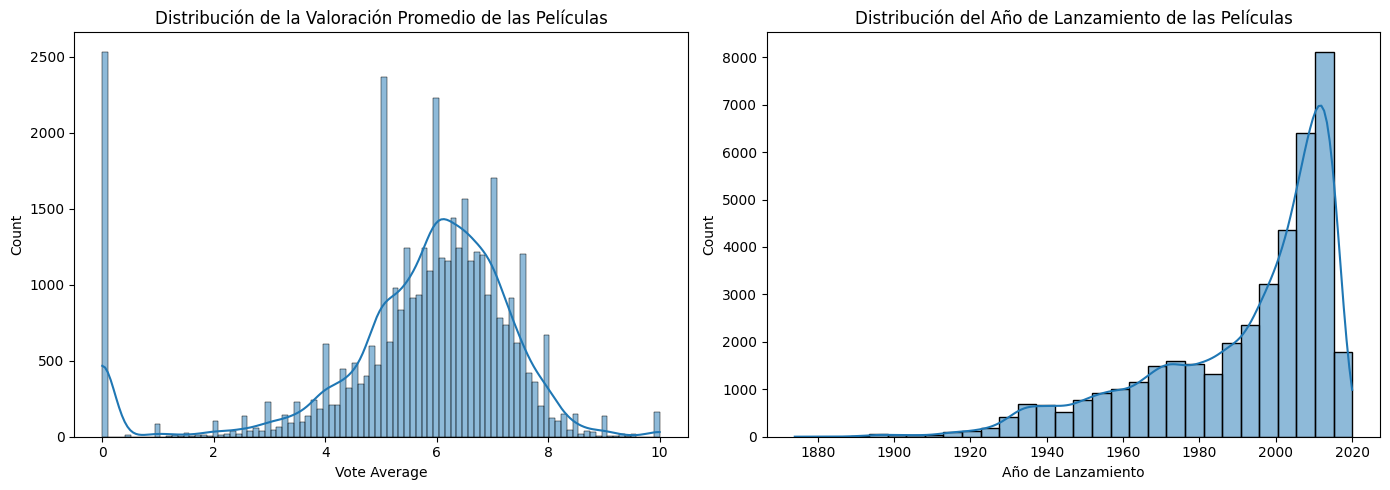

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribución del promedio de votos
sns.histplot(df_movies_api_acotado['vote_average'], kde=True, ax=ax1)
ax1.set_title('Distribución de la Valoración Promedio de las Películas')
ax1.set_xlabel('Vote Average')

# Distribución del año de lanzamiento
sns.histplot(df_movies_api_acotado['release_year'], kde=True, bins=30, ax=ax2)
ax2.set_title('Distribución del Año de Lanzamiento de las Películas')
ax2.set_xlabel('Año de Lanzamiento')

plt.tight_layout()

plt.show()

/var/folders/wl/c_f94vk95sqfq_k2tgz90cs00000gn/T/ipykernel_83761/3535518135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peliculas_por_pais.head(15).index, y=peliculas_por_pais.head(15).values, palette='viridis')


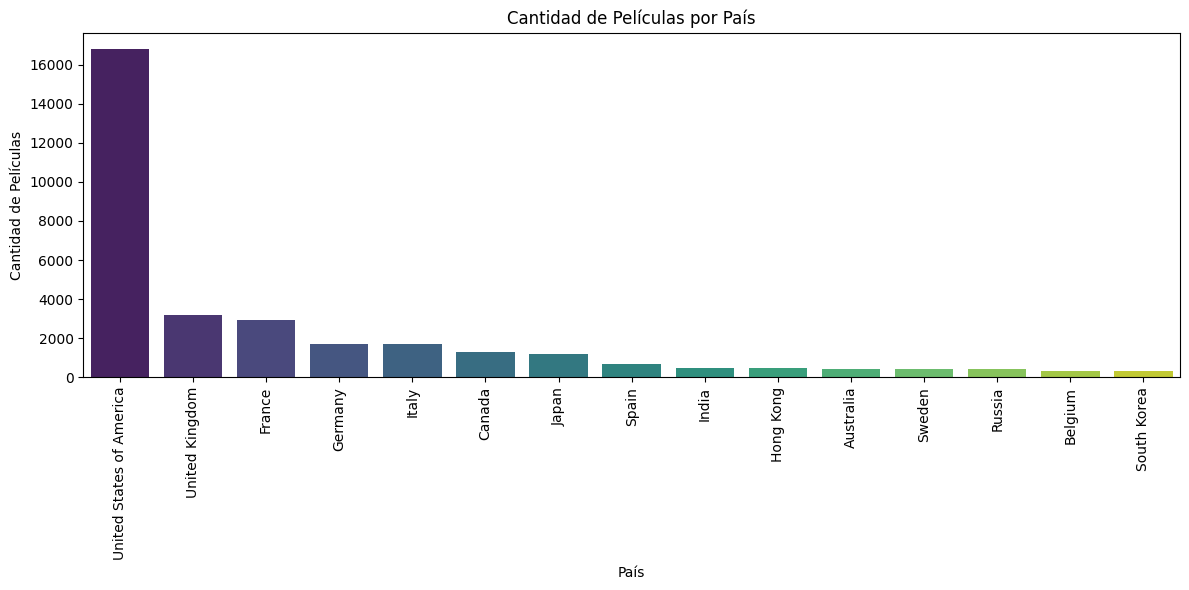

In [7]:
# Contar la cantidad de películas por país
peliculas_por_pais = df_movies_api_acotado['country'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=peliculas_por_pais.head(15).index, y=peliculas_por_pais.head(15).values, palette='viridis')

# Personalizar el gráfico
plt.title('Cantidad de Películas por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=90)  # Rotar los nombres de los países para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


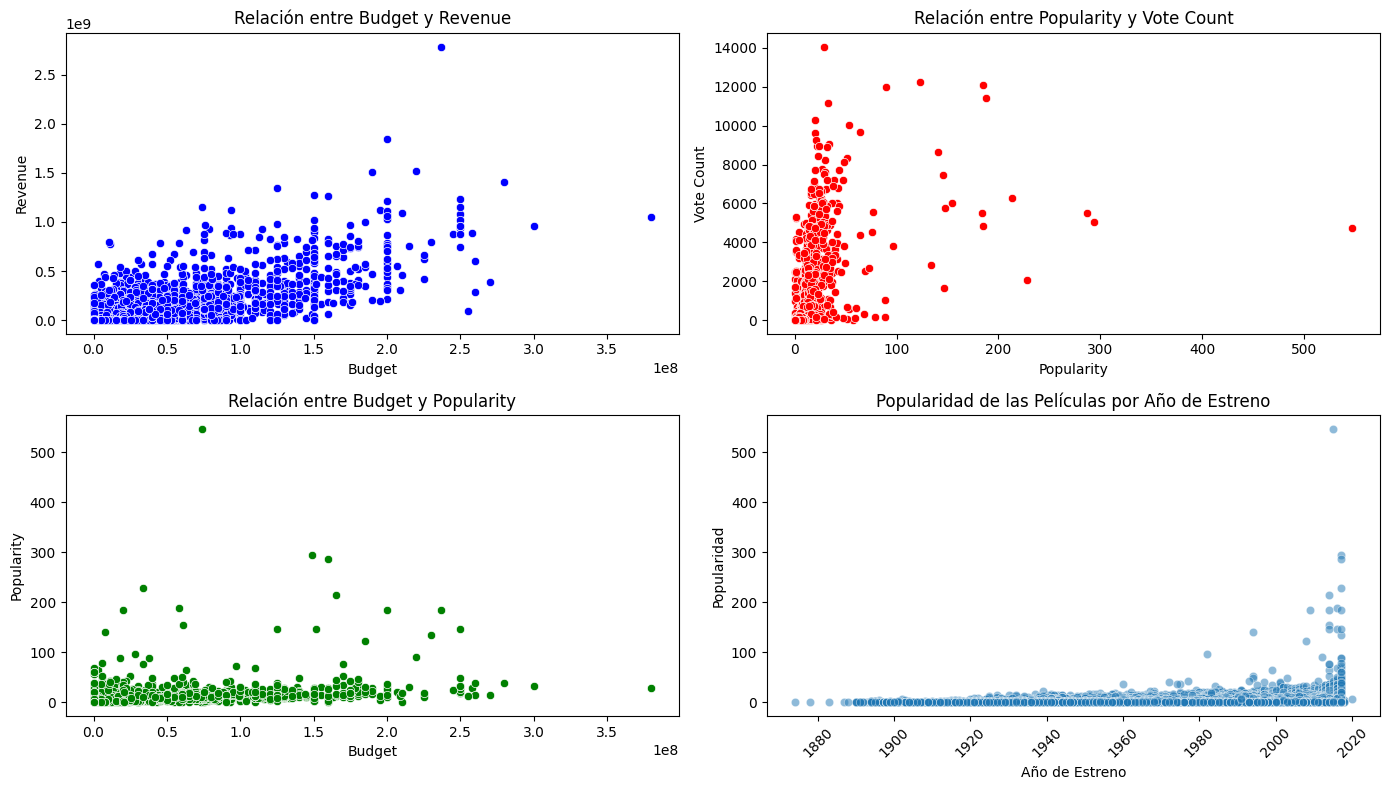

In [8]:
# Crear una figura con cuatro subgráficos en una disposición de 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Gráfico 1: Relación entre Budget y Revenue
sns.scatterplot(data=df_movies_api_acotado, x='budget', y='revenue', ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Relación entre Budget y Revenue')
axs[0, 0].set_xlabel('Budget')
axs[0, 0].set_ylabel('Revenue')

# Gráfico 2: Relación entre Popularity y Vote Count
sns.scatterplot(data=df_movies_api_acotado, x='popularity', y='vote_count', ax=axs[0, 1], color='red')
axs[0, 1].set_title('Relación entre Popularity y Vote Count')
axs[0, 1].set_xlabel('Popularity')
axs[0, 1].set_ylabel('Vote Count')

# Gráfico 3: Relación entre Budget y Popularity
sns.scatterplot(data=df_movies_api_acotado, x='budget', y='popularity', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Relación entre Budget y Popularity')
axs[1, 0].set_xlabel('Budget')
axs[1, 0].set_ylabel('Popularity')

# Gráfico 4: Popularidad de las Películas por Año de Estreno
sns.scatterplot(data=df_movies_api_acotado, x='release_year', y='popularity', ax=axs[1, 1], alpha=0.5)
axs[1, 1].set_title('Popularidad de las Películas por Año de Estreno')
axs[1, 1].set_xlabel('Año de Estreno')
axs[1, 1].set_ylabel('Popularidad')
axs[1, 1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()




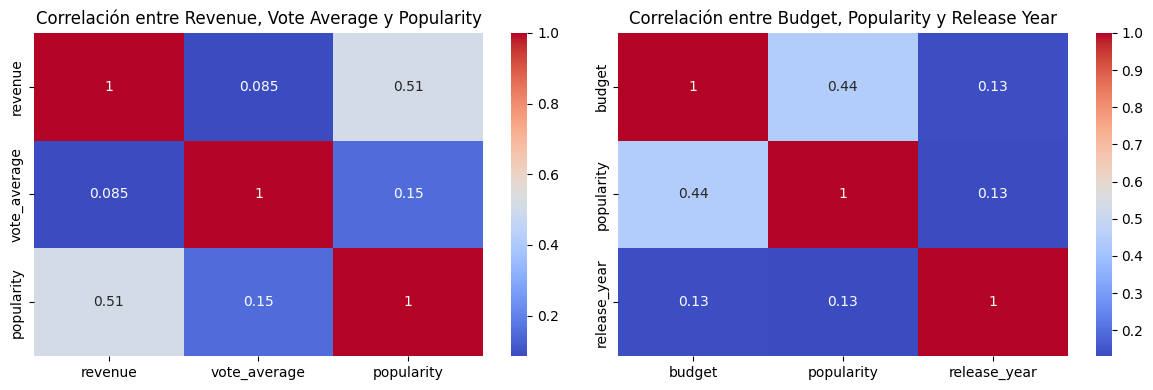

In [9]:
# Heatmaps entre 'revenue', 'vote_average', 'popularity', y entre 'budget', 'popularity', 'release_year'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(df_movies_api_acotado[['revenue', 'vote_average', 'popularity']].corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Correlación entre Revenue, Vote Average y Popularity')

sns.heatmap(df_movies_api_acotado[['budget', 'popularity', 'release_year']].corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Correlación entre Budget, Popularity y Release Year')

plt.tight_layout()

plt.show()


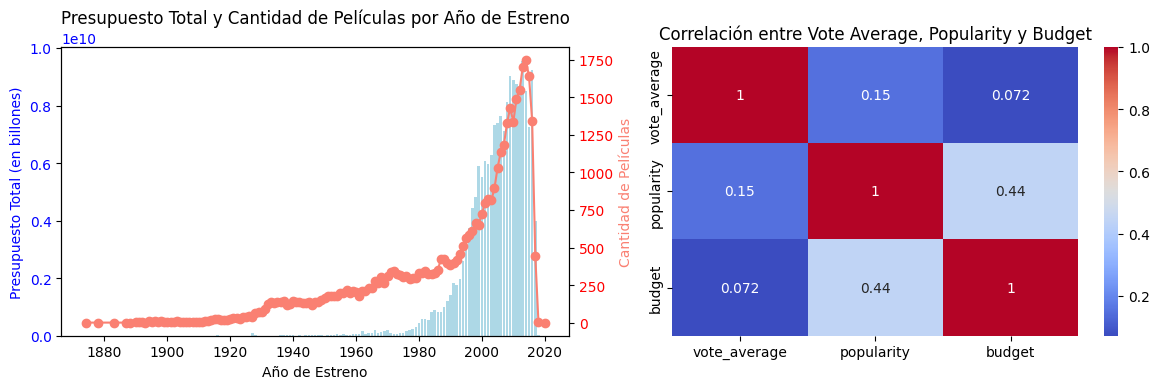

In [10]:
# Histogramas para contrastar la cantidad de peliculas con el presupuesto anual:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(df_movies_api_acotado[['vote_average', 'popularity', 'budget']].corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Correlación entre Vote Average, Popularity y Budget')

budget_per_year = df_movies_api_acotado.groupby('release_year')['budget'].sum()
movies_per_year = df_movies_api_acotado['release_year'].value_counts().sort_index()

ax2.bar(budget_per_year.index, budget_per_year.values, color='lightblue', label='Presupuesto Total por Año')
ax2.set_xlabel('Año de Estreno')
ax2.set_ylabel('Presupuesto Total (en billones)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.plot(movies_per_year.index, movies_per_year.values, color='salmon', label='Cantidad de Películas', marker='o')
ax3.set_ylabel('Cantidad de Películas', color='salmon')
ax3.tick_params(axis='y', labelcolor='red')

ax2.set_title('Presupuesto Total y Cantidad de Películas por Año de Estreno')

plt.tight_layout()

plt.show()